<a href="https://colab.research.google.com/github/DDGUZMANO/Lesiones_NBA_2010-2020/blob/main/TP1/Lesiones_NBA_2010_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

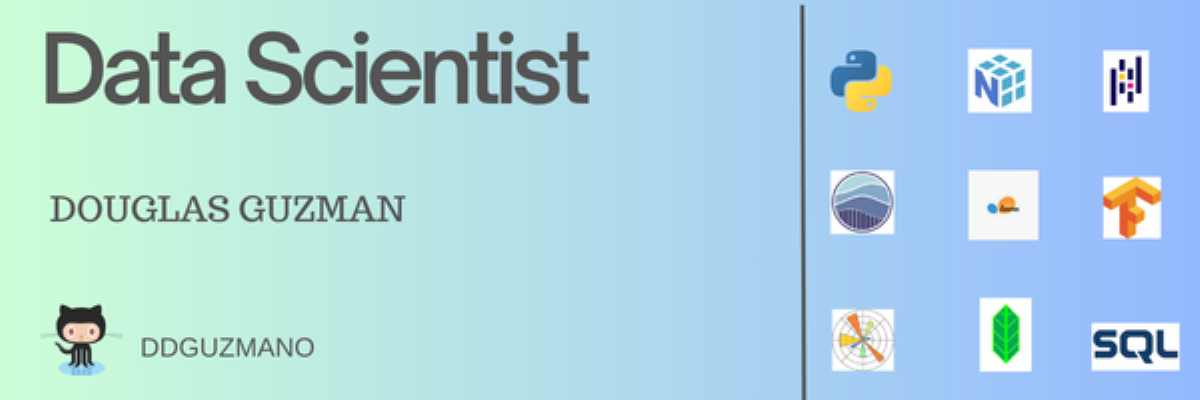

# Analisis exploratorio de datos

En este Notebook analizaremos las lesiones deportivas que sufrieron los jugadores de los diferentes equipos de la NBA durante el periodo de la temporada 2010-2011 hasta la temporada 2019-2020. Buscando de esta manera responder algunas preguntas como:



*   Cuales fueron los equipos que sufrieron el mayor número de lesiones en sus jugadores?
*   Cuales fueron los jugadores con más y menos lesiones?
*   En que temporadas se ocasionaron más lesiones?
*   Que factores pueden influir en la cantidad de lesiones?
*   Cuales fueron las lesiones más comunes?
*   ...

Los datasets de estudios serán, injuries_2010-2020.csv, descargado desde Kaggle cuyo propietario es Randall Hopkins y ...








In [46]:
# Importación de librerias a utilizar

import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

In [47]:
# Montamos nuestro google drive al colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Abrimos el dataset como un dataframe de pandas

DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/Data/injuries_2010-2020.csv'
df_injuries = pd.read_csv(DATA_DIR)

In [49]:
# Primeramente veremos la información que nos presenta el dataframe

df_injuries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27105 entries, 0 to 27104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          27105 non-null  object
 1   Team          27103 non-null  object
 2   Acquired      9542 non-null   object
 3   Relinquished  17560 non-null  object
 4   Notes         27105 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


El dataframe tiene un total de 27105 entradas y 5 columnas.
**Observación:** Podemos ver que las columnas Team, Acquired y Relinquished tienen valores NaN.

In [50]:
# Veamos las primeras cinco entradas del dataframe

df_injuries.head()

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)


In [51]:
# Veamos las últimas cinco entradas del dataframe

df_injuries.tail()

,Date,Team,Acquired,Relinquished,Notes
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD)
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL
27104,2020-10-06,Heat,Bam Adebayo,NaN,returned to lineup


La columna **Date** indica la fecha de la entrada. Con el .info() que aplicamos al dataframe unas lineas atras pudimos ver que esta columna es tipo object, tendremos que convertirla a tipo datetime.

La columna **Team** indica el equipo del jugador relacionado con la lesión.

Podemos entender que la columna **Relinquished** nos indica el nombre del jugador que fue declarado lesionado y la columna **Acquired** nos indica el nombre del jugador cuando fue activado como disponible para jugar.

La columna **Notes** explica el evento, como podemos entender puede ser el nombre de la lesión o la puesta a disposición del jugador posterior a la lesión.



In [52]:
# Convertimos la columna Date a datetime.
# Con el argumento errors = 'coerce', los datos que no puedan ser convertidos datetime
# porque no se ajuste al formato especificado, se guardara como NaT

df_injuries['Date'] = pd.to_datetime(df_injuries['Date'], format='%Y-%m-%d', errors='coerce')

In [53]:
# Verificamos que se modificó el tipo de dato de la columna Date

df_injuries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27105 entries, 0 to 27104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          27105 non-null  datetime64[ns]
 1   Team          27103 non-null  object        
 2   Acquired      9542 non-null   object        
 3   Relinquished  17560 non-null  object        
 4   Notes         27105 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.0+ MB


In [54]:
# Verificamos cuantos tipos de tipos de datos distintos tenemos en la columna Date

n_datos = len(df_injuries['Date'].isna().unique())
print(f'Hay {n_datos} tipos de datos en la columna "Date"')

Hay 1 tipos de datos en la columna "Date"


Con el objetivo de identificar el número de lesiones por cada temporada, tendremos que separar las fechas en una nueva columna llamada **Temporada**, donde tomaremos como inicio el mes de octubre y como final de temporada el mes de agosto del siguiente año (se toma en cuenta la temporada regular, play offs y finales).
Por ejemplo, la temporada 2010 inicia en abril de 2010 y finaliza en agosto del 2011.

In [55]:
# Creamos la columan Temporada de tipo datetime
df_injuries['Temporada'] = pd.to_datetime(df_injuries['Date']).dt.year

# Ajustar la temporada para los meses de octubre a diciembre
df_injuries.loc[pd.to_datetime(df_injuries['Date']).dt.month.between(1, 9), 'Temporada'] -= 1

# Crear columnas adicionales para indicar si la fecha está en la temporada regular, playoffs o finales
df_injuries['Regular'] = (pd.to_datetime(df_injuries['Date']).dt.month.between(10, 12)) | (pd.to_datetime(df_injuries['Date']).dt.month.between(1, 4))
df_injuries['Playoffs'] = pd.to_datetime(df_injuries['Date']).dt.month.between(4, 6)
df_injuries['Finales'] = pd.to_datetime(df_injuries['Date']).dt.month.between(6, 8)

# Mostrar el DataFrame resultante
df_injuries.head()

,Date,Team,Acquired,Relinquished,Notes,Temporada,Regular,Playoffs,Finales
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010,True,False,False
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010,True,False,False
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,2010,True,False,False
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),2010,True,False,False
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),2010,True,False,False


Para la temporada 2019 tuvimos la pandemia del covid, por lo que el calendario de los partidos de la NBA fue significativamente modificado.
La temporada regular tuvo inicio en octubre de 2019 y final en agosto de 2020, los play offs fueron desde agosto hasta octubre y las finales se jugaron en octubre de 2020.

In [56]:
df_injuries.tail(10)

,Date,Team,Acquired,Relinquished,Notes,Temporada,Regular,Playoffs,Finales
27095,2020-09-12,Rockets,NaN,Tyson Chandler,placed on IL with neck spasms (out for season),2019,False,False,False
27096,2020-09-18,Celtics,NaN,Romeo Langford,placed on IL with strained right adductor (out...,2019,False,False,False
27097,2020-09-22,Celtics,NaN,Romeo Langford,surgery on right wrist (out for season),2019,False,False,False
27098,2020-09-23,Heat,NaN,Gabe Vincent,sore right knee (DTD),2019,False,False,False
27099,2020-09-30,Heat,NaN,Bam Adebayo,strained left shoulder (DTD),2019,False,False,False
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL,2019,False,False,False
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD),2020,True,False,False
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...,2020,True,False,False
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL,2020,True,False,False
27104,2020-10-06,Heat,Bam Adebayo,NaN,returned to lineup,2020,True,False,False


Modificamos las fechas de inicio y final de temporada para la edición del 2019, en las columnas **Temporada**, **Regular**, **Playoffs** y **Finales**.

In [57]:
df_injuries['Temporada'] = df_injuries['Temporada'].replace({2020: 2019})
df_injuries['Temporada'].loc[pd.to_datetime(df_injuries['Date']).between('2019-10-22', '2020-10-11')] = 2019
df_injuries['Regular'] = pd.to_datetime(df_injuries['Date']).between('2019-10-10', '2020-08-14')
df_injuries['Playoffs'] = pd.to_datetime(df_injuries['Date']).between('2020-08-17', '2020-09-30')
df_injuries['Finales'] = pd.to_datetime(df_injuries['Date']).between('2020-10-01', '2020-10-11')


<ipython-input-57-cb67202d0b09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injuries['Temporada'].loc[pd.to_datetime(df_injuries['Date']).between('2019-10-22', '2020-10-11')] = 2019


In [58]:
# Verificamos que fueron tomados los valores correspondientes

df_injuries.tail(15)

,Date,Team,Acquired,Relinquished,Notes,Temporada,Regular,Playoffs,Finales
27090,2020-09-08,Lakers,NaN,Dion Waiters,placed on IL with left groin injury,2019,False,True,False
27091,2020-09-08,Bucks,Giannis Antetokounmpo,NaN,returned to lineup,2019,False,True,False
27092,2020-09-08,Bucks,NaN,Giannis Antetokounmpo,sprained right ankle (DTD),2019,False,True,False
27093,2020-09-10,Lakers,NaN,JaVale McGee,sprained left ankle (DTD),2019,False,True,False
27094,2020-09-12,Lakers,JaVale McGee,NaN,returned to lineup,2019,False,True,False
27095,2020-09-12,Rockets,NaN,Tyson Chandler,placed on IL with neck spasms (out for season),2019,False,True,False
27096,2020-09-18,Celtics,NaN,Romeo Langford,placed on IL with strained right adductor (out...,2019,False,True,False
27097,2020-09-22,Celtics,NaN,Romeo Langford,surgery on right wrist (out for season),2019,False,True,False
27098,2020-09-23,Heat,NaN,Gabe Vincent,sore right knee (DTD),2019,False,True,False
27099,2020-09-30,Heat,NaN,Bam Adebayo,strained left shoulder (DTD),2019,False,True,False


Veamos como se distribuyen las cantidades de lesiones por temporada

In [66]:
# Para esto nos quedaremos con la columna 'Relinquished' (que expresa el momento en que empieza
# la lesion del jugador) y la columna 'Temporada' y eliminaremos los valores NaN de la columna
# 'Relinquished'

df_solo_lesiones = df_injuries[['Relinquished','Temporada']]
print(df_solo_lesiones.shape)
dfsolo_lesiones_sin_nulos = df_solo_lesiones.dropna()
print(dfsolo_lesiones_sin_nulos.shape)


(27105, 2)
(17560, 2)


In [72]:
# Verificamos que no existan valores NaN en la columna 'Relinquished'

hay_nan = dfsolo_lesiones_sin_nulos['Relinquished'].isna().any()
print("¿Hay valores NaN en la columna 'Nombre_Columna'? ", hay_nan)

¿Hay valores NaN en la columna 'Nombre_Columna'?  False


In [73]:
# Agruparemos las lesiones por temporada así podremos graficar los resuldaos

df_temp_lesiones = dfsolo_lesiones_sin_nulos.groupby(dfsolo_lesiones_sin_nulos['Temporada']).count()

df_temp_lesiones.head()

,Relinquished
Temporada,
2010,1775
2011,1941
2012,1861
2013,2404
2014,1451


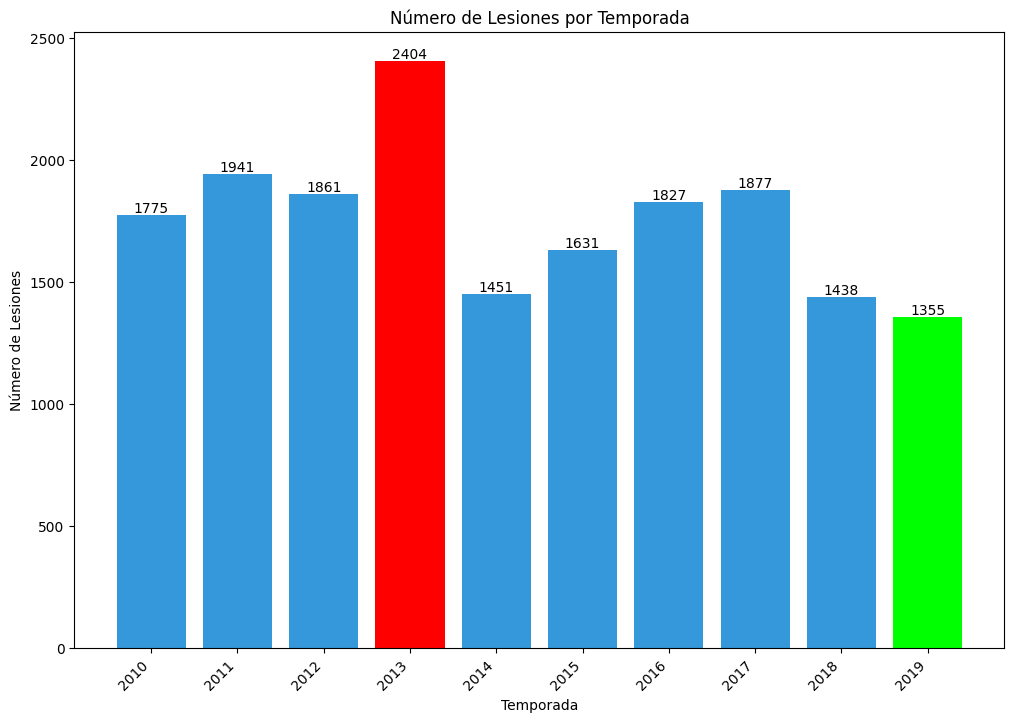

In [74]:
# Procedemos a realizar un gráfico de barras entre el número de lesiones y las temporadas
# usaremos pyplot de matplotlib

plt.figure(figsize=(12, 8))

temporada_max_lesiones = df_temp_lesiones['Relinquished'].idxmax()
temporada_min_lesiones = df_temp_lesiones['Relinquished'].idxmin()

bar_plot = plt.bar(df_temp_lesiones.index, df_temp_lesiones['Relinquished'], color=['#FF0000' if index == temporada_max_lesiones else '#00FF00' if index == temporada_min_lesiones else '#3498db' for index in df_temp_lesiones.index])

plt.xlabel('Temporada')
plt.ylabel('Número de Lesiones')
plt.title('Número de Lesiones por Temporada')

plt.xticks(df_temp_lesiones.index, rotation=45, ha='right')

for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


plt.show()

Podemos ver que existe una enorme diferencia entre el número de lesiones del año 2013 y el del año 2019.